# Ames Iowa Statistical Analysis
Pre-processing, exploration (EDA) and statistical analysis of the Ames Iowa Housing Dataset. This notebook was created in fulfilment of course work 1 for the module details listed below:

- Module Code: CS4S767
- Module Title: Data Mining
- Submission Date: 17th November 2025
- Return Date: 19th January 2026
- Module/Leader: Ieuan Griffiths
- Student Name: Morenikeji Elijah Popoola

### Import all necessary libraries

In [2]:
# perform all necessary library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Task 1: Pre-Processing & EDA

### Custom display configuration overriding pandas defaults

We will override two default display options provided by pandas.

`display.max_columns`: controls the maximum number of columns that are shown when a DataFrame is printed in the notebook. We will be setting this to 100, ensuring all 82 columns are visible.

`display.width`: controls the maximum number of characters pandas will use when printing a DataFrame in the notebook, we will be setting this to 200.

Then we will be loading the dataset and display some information about it, like the row/column counts, missing value counts e.t.c, then we will do a preliminary investigation of the dataset.

In [3]:
# Custom display configuration overriding pandas defaults
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 200)

dataset_path = "./AmesHousing.csv"
df = pd.read_csv(dataset_path)

# Basic inspection
print("Dataset loaded successfully!")
print(f"Shape of dataset: Rows = {df.shape[0]}, Columns = {df.shape[1]}")
print("\nPreview of data:")
df.head()

Dataset loaded successfully!
Shape of dataset: Rows = 2930, Columns = 82

Preview of data:


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Preliminary Inspection - Structural overview and variable classification

In [4]:
print("\nDataset Info:")
print(df.info()) #prints data types and non-null counts.

print("\nTop 30 columns with missing values:")
null_stats = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['missing_value_count']) # Count of missing values per column
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)
print(null_stats.head(30))

print("\nSummary statistics (numeric variables):")
print(df.describe()) # output provides statistical summaries (mean, std, min, quartiles, max) for numeric columns.



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17 

From the code snippets written above here are the observations about the dataset:

#### 1. Data structure and completeness

The dataset contains 2,930 observations(rows) with 82 variables(columns), encompassing a wide range of property attributes in Ames Iowa, such as building class, zoning, lot area, neighborhood, condition, and various quality ratings. Preliminary inspection reveals that a large portion of the variables are qualitative(categorical) representing conditions, quality levels, or material types. This combination of quantitative(continuous/discrete) and qualitative(categorical) data types provides a rich foundation for both descriptive analysis and predictive modeling.


#### 2. Central tendency and variability

Using `describe()`, the average sale price across properties is typically around $180,000–$185,000, with a standard deviation near $80,000, indicating substantial variability in property values. Lot areas vary widely from compact city plots around 2,000 sq.ft to estates exceeding 200,000 sq.ft, confirming the data covers diverse housing segments. Similarly, the `Gr Liv Area` (above-ground living area in square feet) displays significant spread, reflecting the dataset’s diversity in home sizes.

### Preliminary data cleaning: handling missing values

Upon reviewing the data types and null counts, we observe that several columns contain missing values, particularly those related to luxury or optional property features pools, fences, and alley access. These are not random omissions; they often represent absence of a feature rather than incomplete data. This distinction is important because replacing such missing entries with numeric averages would incorrectly imply those features exist. However, since this stage is primarily exploratory, we handled missing values via appropriate value imputation to create a clean, complete working dataset suitable for EDA and visualization.

Columns like `PoolQC`, `Fence`, `Alley`, `Mas Vnr Type`, `FireplaceQu`, and `MiscFeature` have many missing entries. From a data semantics perspective, these indicate non-existent features rather than data loss for example, homes without pools or fences. Recognizing this early is vital, as such missingness can carry predictive information about home price. Houses with pools or finished basements may systematically sell for higher prices as observed in the histogram below.

`MS SubClass` column has been loaded (parsed) has an interger(int64) type column, we should convert it back to a categoral(nominal) type value in string format

In [5]:
df["MS SubClass"] = df["MS SubClass"].astype(str).apply(lambda x : "C" + x.rjust(3, '0'))
df.head(3)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,C020,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,C020,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,C020,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


#### Drop sparsely populated columns

Among the 27 columns containing missing entries, seven(7) have just a single missing value each. In contrast, the `Pool QC` column is the least populated, with only 13 non-missing entries.

To begin the data cleaning process, the three columns with the lowest data availability (`Pool QC` > 90% missing, `Misc Feature` > 90% missing, and `Alley` > 90% missing) will be removed, as each contains valid data for fewer than 10% of the total records.

In [6]:
df.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

#### Create a function to handle missing data

Some columns show a pattern of partial missing values, with the existing entries being non-numeric. To address this, we introduce a utility function that performs the necessary filling and replacement operations.

In [7]:
def fill_and_replace(col, fill_na_value, map_dict, verbose=True, dataset=df):
    pd.set_option('future.no_silent_downcasting', True)
    if verbose:
        print('Original value counts for {}:'.format(col))
        print(dataset.loc[:,col].value_counts(dropna=False))
    if fill_na_value is not None:
        if verbose:
            print('Filling missing values with \`{}\`'.format(fill_na_value))
        result = dataset.loc[:,col].fillna(fill_na_value)
    else:
        if verbose:
            print('No fill_na_value specified, skipping fillna')
        result = dataset.loc[:,col]
    
    result = result.replace(map_dict).infer_objects(copy=False)
    
    if verbose:
        print('After mapping for {}:'.format(col))
        print(result.value_counts(dropna=False))
    print('Finished fill-and-replace for column \'{}\''.format(col))
    return result;

### Fix missing values in ordinal columns with non-numeric data

The `Fence` column is an ordinal feature containing 400 non-missing entries. Based on the data documentation, we’ll impute the missing values using "NA" and convert the column into a numeric format. This same fill-and-replace strategy will then be applied to nine additional ordinal columns.

In [8]:
df.loc[:,'Fence'] = fill_and_replace('Fence', 'NA', {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}, False)

df.loc[:,'Fireplace Qu'] = fill_and_replace('Fireplace Qu', 'NA', {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, False)

df.loc[:,'Garage Cond'] = fill_and_replace('Garage Cond', 'NA', {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, False)

df.loc[:,'Garage Qual'] = fill_and_replace('Garage Qual', 'NA', {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, False)

df.loc[:,'Garage Finish'] = fill_and_replace('Garage Finish', 'NA', {'NA':0,'Unf':1,'RFn':2,'Fin':3}, False)

df.loc[:,'Bsmt Exposure'] = fill_and_replace('Bsmt Exposure', 'NA', {'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4}, False)

df.loc[:,'BsmtFin Type 1'] = fill_and_replace('BsmtFin Type 1', 'NA', {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}, False)

df.loc[:,'BsmtFin Type 2'] = fill_and_replace('BsmtFin Type 2', 'NA', {'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}, False)

df.loc[:,'Bsmt Cond'] = fill_and_replace('Bsmt Cond', 'NA', {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, False)

df.loc[:,'Bsmt Qual'] = fill_and_replace('Bsmt Qual', 'NA', {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}, False)

df.loc[:,'Electrical'] = fill_and_replace('Electrical', 0, {'Mix': 0, 'FuseP': 1, 'FuseF': 2, 'FuseA': 3, 'SBrkr':4}, False)

Finished fill-and-replace for column 'Fence'
Finished fill-and-replace for column 'Fireplace Qu'
Finished fill-and-replace for column 'Garage Cond'
Finished fill-and-replace for column 'Garage Qual'
Finished fill-and-replace for column 'Garage Finish'
Finished fill-and-replace for column 'Bsmt Exposure'
Finished fill-and-replace for column 'BsmtFin Type 1'
Finished fill-and-replace for column 'BsmtFin Type 2'
Finished fill-and-replace for column 'Bsmt Cond'
Finished fill-and-replace for column 'Bsmt Qual'
Finished fill-and-replace for column 'Electrical'


### Fix missing values in nominal and continous columns

On inspection of the `Mas Vnr Type` column we observe there are 1775 missing values, we will be replacing the missing values with a slightly different norminal value.

In [9]:
df.loc[:,'Mas Vnr Type'] = df.loc[:,'Mas Vnr Type'].fillna('None')
print(df.loc[:,'Mas Vnr Type'].value_counts(dropna=False))

Mas Vnr Type
None       1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64


We will be filling the missing values in `Lot Frontage` column with the mean.

In [10]:
df.loc[:,'Lot Frontage'] = df.loc[:,'Lot Frontage'].fillna(df.loc[:,'Lot Frontage'].mean())
print(df.loc[:,'Lot Frontage'].value_counts(dropna=False))

Lot Frontage
69.22459     490
60.00000     276
80.00000     137
70.00000     133
50.00000     117
            ... 
119.00000      1
137.00000      1
25.00000       1
152.00000      1
133.00000      1
Name: count, Length: 129, dtype: int64


We will leave these `Garage Yr Blt`(Year garage was built) missing values untouched as there is no way to predict the year value and we also can't extrapolate the data from other fields.

Following up with replacing the missing values of `Garage Type` with a slightly different norminal value and doing the same for the following columns: 

- `Mas Vnr Area`
- `Bsmt Half Bath`
- `Bsmt Full Bath`
- `Total Bsmt SF`
- `Bsmt Unf SF`
- `BsmtFin SF 2`
- `BsmtFin SF 1`
- `Garage Cars`
- `Garage Area`

In [11]:
df.loc[:,'Garage Type'] = df.loc[:,'Garage Type'].fillna('NA')
print(df.loc[:,'Garage Type'].value_counts(dropna=False))

print("\n")
df.loc[:,'Mas Vnr Area'] = df.loc[:,'Mas Vnr Area'].fillna(0.0)
print(df.loc[:,'Mas Vnr Area'].value_counts(dropna=False))


print("\n")
df.loc[:,'Bsmt Half Bath'] = df.loc[:,'Bsmt Half Bath'].fillna(0.0)
print(df.loc[:,'Bsmt Half Bath'].value_counts(dropna=False))

print("\n")
df.loc[:,'Bsmt Full Bath'] = df.loc[:,'Bsmt Full Bath'].fillna(0.0)
print(df.loc[:,'Bsmt Full Bath'].value_counts(dropna=False))

print("\n")
df.loc[:,'Total Bsmt SF'] = df.loc[:,'Total Bsmt SF'].fillna(0.0)
print(df.loc[:,'Total Bsmt SF'].value_counts(dropna=False))

print("\n")
df.loc[:,'Bsmt Unf SF'] = df.loc[:,'Bsmt Unf SF'].fillna(0.0)
print(df.loc[:,'Bsmt Unf SF'].value_counts(dropna=False))


print("\n")
df.loc[:,'BsmtFin SF 2'] = df.loc[:,'BsmtFin SF 2'].fillna(0.0)
print(df.loc[:,'BsmtFin SF 2'].value_counts(dropna=False))

print("\n")
df.loc[:,'BsmtFin SF 1'] = df.loc[:,'BsmtFin SF 1'].fillna(0.0)
print(df.loc[:,'BsmtFin SF 1'].value_counts(dropna=False))

print("\n")
df.loc[:,'Garage Cars'] = df.loc[:,'Garage Cars'].fillna(0.0)
print(df.loc[:,'Garage Cars'].value_counts(dropna=False))

print("\n")
df.loc[:,'Garage Area'] = df.loc[:,'Garage Area'].fillna(0.0)
print(df.loc[:,'Garage Area'].value_counts(dropna=False))

Garage Type
Attchd     1731
Detchd      782
BuiltIn     186
NA          157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


Mas Vnr Area
0.0       1771
120.0       15
176.0       13
200.0       13
216.0       12
          ... 
714.0        1
647.0        1
1290.0       1
495.0        1
443.0        1
Name: count, Length: 445, dtype: int64


Bsmt Half Bath
0.0    2755
1.0     171
2.0       4
Name: count, dtype: int64


Bsmt Full Bath
0.0    1709
1.0    1181
2.0      38
3.0       2
Name: count, dtype: int64


Total Bsmt SF
0.0       80
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
839.0      1
1146.0     1
1415.0     1
1684.0     1
1003.0     1
Name: count, Length: 1058, dtype: int64


Bsmt Unf SF
0.0       245
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1442.0      1
1099.0      1
804.0       1
154.0       1
239.0       1
Name: count, Length: 1137, dtype: int64


BsmtFin SF 2
0.0      2579
294.0       5
180.0      

Confirm no missing values remain execpt the 159 from `Garage Yr Blt`

In [12]:
print("\nTop 30 columns with missing values:")
null_stats = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['missing_value_count']) # Count of missing values per column
null_stats.loc[:,'% of dataset'] = np.round(null_stats.loc[:,'missing_value_count'] / df.shape[0] * 100, 2)
null_stats.loc[null_stats.loc[:,'missing_value_count']>0,:].sort_values(by='missing_value_count', ascending=False)
print(null_stats.head(30))


Top 30 columns with missing values:
                 missing_value_count  % of dataset
Garage Yr Blt                    159          5.43
Order                              0          0.00
Half Bath                          0          0.00
Fireplace Qu                       0          0.00
Fireplaces                         0          0.00
Functional                         0          0.00
TotRms AbvGrd                      0          0.00
Kitchen Qual                       0          0.00
Kitchen AbvGr                      0          0.00
Bedroom AbvGr                      0          0.00
Full Bath                          0          0.00
Bsmt Half Bath                     0          0.00
Bsmt Full Bath                     0          0.00
Gr Liv Area                        0          0.00
Low Qual Fin SF                    0          0.00
2nd Flr SF                         0          0.00
1st Flr SF                         0          0.00
Electrical                         0         

### Map numeric values in ordinal columns with complete data

While processing the missing values in the dataset, some ordinal columns have already been mapped to numeric form. There remains more ordinal columns that were not dealt with in the missing values patching phase, here we will be mapping the columns used in our analysis.

In [13]:
df.loc[:,'Paved Drive'] = fill_and_replace('Paved Drive', None, {'N': 0, 'P': 1, 'Y': 2}, False)

Finished fill-and-replace for column 'Paved Drive'


### Preliminary investigation: univariate analysis

Univariate analysis is the examination of a single variable in a dataset to understand its distribution, central tendency, and variability.

Why univariate:
- Helps detect data quality issues like outliers or missing values.
- Provides a baseline understanding before exploring relationships between variables.

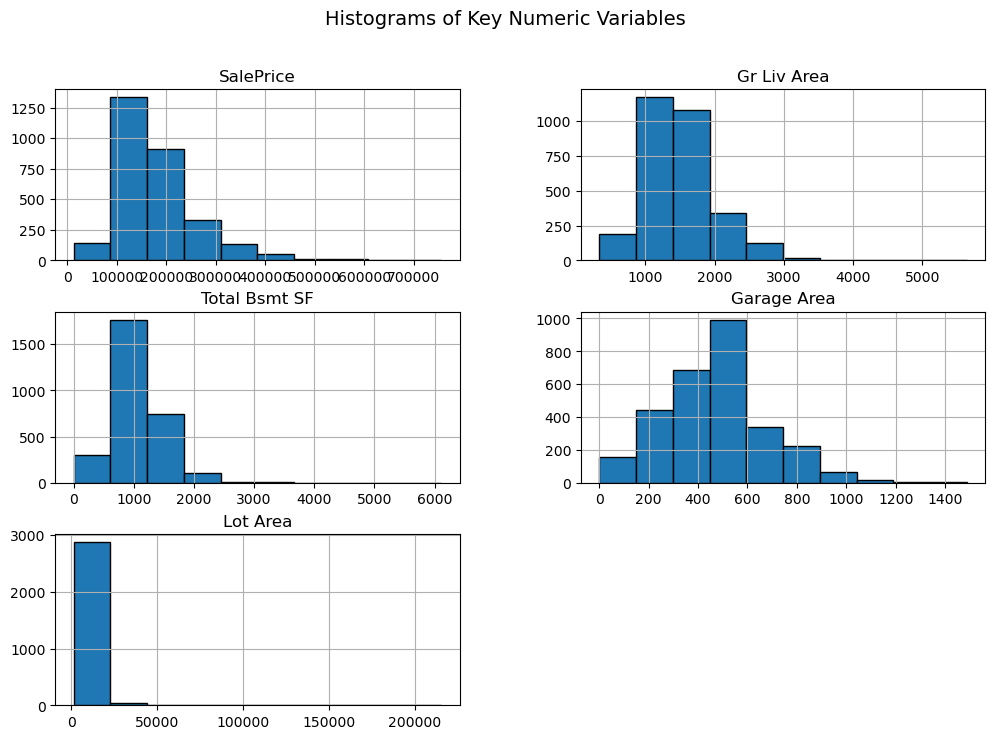

SalePrice: Skewness = 1.74, Kurtosis = 5.12
Gr Liv Area: Skewness = 1.27, Kurtosis = 4.14
Total Bsmt SF: Skewness = 1.15, Kurtosis = 9.11
Garage Area: Skewness = 0.24, Kurtosis = 0.95
Lot Area: Skewness = 12.82, Kurtosis = 265.02


In [14]:
# Univariate distributions of key numeric features
key_features = ["SalePrice", "Gr Liv Area", "Total Bsmt SF", "Garage Area", "Lot Area"]
df[key_features].hist(figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Key Numeric Variables", fontsize=14)
plt.show()

for col in key_features:
    skew_val = df[col].skew() # Check skewness
    kurt_val = df[col].kurt() # Check kurtosis (shape of a distribution)
    print(f"{col}: Skewness = {skew_val:.2f}, Kurtosis = {kurt_val:.2f}")

The above Histogram plot shows that `SalePrice` is right-skewed (skewness > 1), meaning most homes are clustered in the lower-to-middle price range, while a few expensive homes form a long right tail. This is common in housing datasets where luxury properties are rare but high-value outliers. `Gr Liv Area` and `Lot Area` also display similar right-skewness, implying a log transformation could be beneficial for future modeling to normalize their distributions.

### Relationship between SalePrice and main continuous variables (Key Features)

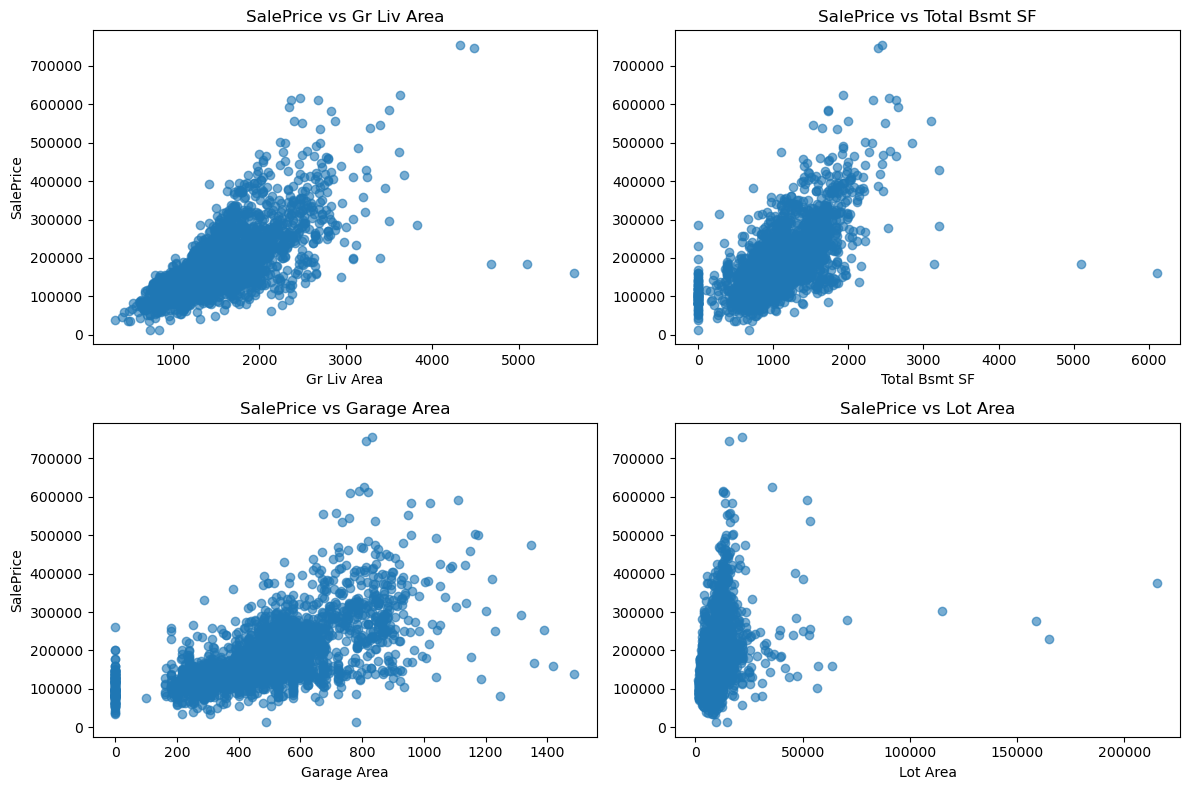

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].scatter(df["Gr Liv Area"], df["SalePrice"], alpha=0.6)
axes[0, 0].set_title("SalePrice vs Gr Liv Area")
axes[0, 0].set_xlabel("Gr Liv Area")
axes[0, 0].set_ylabel("SalePrice")

axes[0, 1].scatter(df["Total Bsmt SF"], df["SalePrice"], alpha=0.6)
axes[0, 1].set_title("SalePrice vs Total Bsmt SF")
axes[0, 1].set_xlabel("Total Bsmt SF")

axes[1, 0].scatter(df["Garage Area"], df["SalePrice"], alpha=0.6)
axes[1, 0].set_title("SalePrice vs Garage Area")
axes[1, 0].set_xlabel("Garage Area")
axes[1, 0].set_ylabel("SalePrice")

axes[1, 1].scatter(df["Lot Area"], df["SalePrice"], alpha=0.6)
axes[1, 1].set_title("SalePrice vs Lot Area")
axes[1, 1].set_xlabel("Lot Area")

plt.tight_layout()
plt.show()

The Scatter plots reveal strong positive linear trends between `SalePrice` and features such as `Gr Liv Area`, `Total Bsmt SF`, and `Garage Area`. This indicates that larger homes with spacious garages or basements generally command higher market values. Conversely, `Lot Area` shows a weaker association suggesting that lot size alone, while important, doesn’t translate linearly to price without considering neighborhood and construction quality.

With the scatter-plot we can observe that properties with a living area exceeding 4000 square are only 5 in count. Hence, we can classify them as extreme outliers. This is clearly visible from the box plot drawn below:

<Axes: title={'center': 'Boxplot higlighting properties with living areas greater than 4000 sq as extreme outliers'}, ylabel='Above ground living area square feet'>

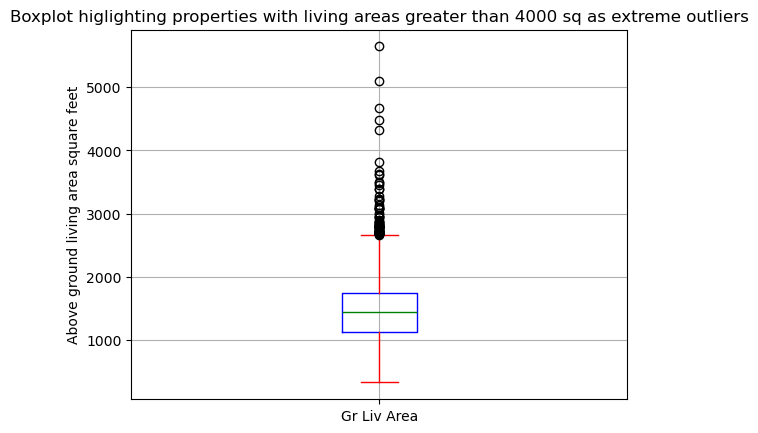

In [16]:
df.plot(kind="box", column="Gr Liv Area", 
        color=dict(boxes='b', whiskers='r', medians='g', caps='r'),
        title="Boxplot higlighting properties with living areas greater than 4000 sq as extreme outliers",
        ylabel="Above ground living area square feet",
        grid=True)

Those properties will be excluded from the dataset

In [17]:
df.drop(index=df.loc[df.loc[:,'Gr Liv Area'] > 4000].index, inplace=True)

### Correlation matrix and linear relationships checks


Correlation matrix:
               SalePrice  Gr Liv Area  Total Bsmt SF  Garage Area  Lot Area
SalePrice       1.000000     0.719463       0.658863     0.648050  0.270047
Gr Liv Area     0.719463     1.000000       0.401292     0.474945  0.258529
Total Bsmt SF   0.658863     0.401292       1.000000     0.476328  0.219666
Garage Area     0.648050     0.474945       0.476328     1.000000  0.198746
Lot Area        0.270047     0.258529       0.219666     0.198746  1.000000


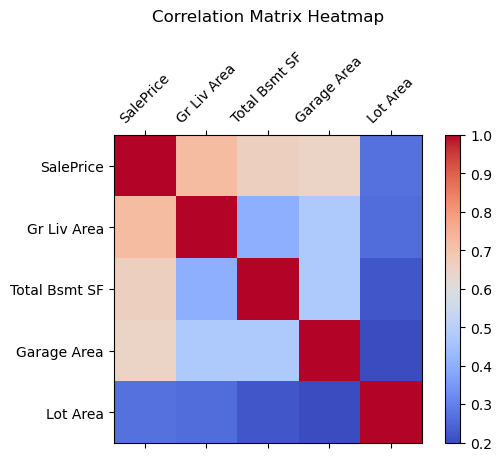

In [18]:
corr_matrix = df[["SalePrice", "Gr Liv Area", "Total Bsmt SF", "Garage Area", "Lot Area"]].corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize correlation with matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar(cax)
plt.title("Correlation Matrix Heatmap", pad=20)
plt.show()

The correlation matrix numerically confirms these relationships:

- Gr Liv Area and SalePrice correlation ≈ 0.70–0.75 (strong).
- Total Bsmt SF and SalePrice correlation ≈ 0.60–0.65.
- Garage Area and SalePrice correlation ≈ 0.62–0.68.
- Lot Area correlation ≈ 0.25–0.30 (moderate).

These values imply that usable living space and building quality dominate price determination, overshadowing land size alone.

#### Key preliminary insights

1. SalePrice is right-skewed, typical of monetary data; log-transforming will normalize for regression models.
2. Living space is the single strongest driver of home price, explaining nearly half the variance by itself.
3. Lot area contributes weakly to price differences once living space is accounted for perhaps due to zoning or neighborhood effects.
4. Missingness in luxury-related features carries meaning and should be encoded rather than dropped.

### Pre-Processing & EDA Summary

The preliminary EDA establishes that the Ames Housing dataset is clean, rich, and statistically informative. Price is heavily influenced by structural and qualitative housing attributes rather than sheer land size. The analysis reveals clear linear relationships, interpretable patterns, and well-understood missingness mechanisms forming a solid foundation for advanced modeling and feature engineering.

# Task 2 & 3: Statistical Analysis & Data Visualization

### Statistical Test 1 - Relationship between two variables

We observed in the Exploratory Data Analysis section that there is a strong relationship between the `SalePrice` and key features like `Gr Liv Area` or `Total Bsmt SF`, though the connections is observable it is not confirmed as there is a significant linear connenction between the two variables. Hence, we need to determine(confirm) whether there is a statistically significant linear relationship between `SalePrice` and `Gr Liv Area`(Above grade-ground living area square feet).


The hypothesis is as follows:

- $H_0: \rho = 0$.      *There is no linear correlation between SalePrice and Gr Liv Area*.
- $H_1: \rho \neq 0$.   *There is a linear correlation between SalePrice and Gr Liv Area.*

Where $H_0$ is the null hypothesis and $H_1$ is the alternative hypothesis.

A suitable test for this hypothesis would be to use Pearsons Correlation Coefficient test. The following assumptions will hold: 

1. Level of Measurement: The two variables should be measured at the interval or ratio level.

2. Linear Relationship: There should exist a linear relationship between the two variables.

3. Normality: Both variables should be roughly normally distributed.

4. Related Pairs: Each observation in the dataset should have a pair of values.

5. No Outliers: There should be no extreme outliers in the dataset.


If any of these assumptions fail, then we will fallback to Spearman correlation coefficient.

### Assumption 1: Level of Measurement

Both `SalePrice` and `Gr Liv Area` are continuous values they are typically measured at the interval or ratio level, which means they meet the level of measurement assumption required for using Pearson’s correlation coefficient.

### Assumption 2: Linear Relationship

Visual inspection of the scatter plot drawn in the Exploratory Data Analysis section above gives us a clear positive linear trend, showing there exists a linear relationship between the two variables.

### Assumption 3: Normality

In the Shapiro-Wilk test, the null and alternative hypothesis is as follows:

- $H_0$: *The data are normally distributed*
- $H_1$: *The data are NOT normally distributed*

The $\alpha$ value is 5%. If $p < 0.05$ then we reject the null hypothesis.

In [19]:
# Step 1: Check normality (assumption for Pearson correlation)
stat_price, p_price = stats.shapiro(df["SalePrice"])
stat_area, p_area = stats.shapiro(df["Gr Liv Area"])
print("TRUE" if p_price < 0.05 else "FALSE")
print("Shapiro-Wilk test for normality:")
print(f"SalePrice p-value = {p_price:.50f}")
print(f"Gr Liv Area p-value = {p_area:.50f}")

TRUE
Shapiro-Wilk test for normality:
SalePrice p-value = 0.00000000000000000000000000000000000000000507756282
Gr Liv Area p-value = 0.00000000000000000000000000010801488361429956028342


The outcome of our Shapiro-Wilk test would suggest that the p-value's of `SalesPrice` and `Gr Liv Area` are `2.334908827586905e-43` and `2.7451915748011043e-34` respectively. Hence this is significantly lower than our critical value for $\alpha = 0.05$. Hence we reject the null hypothesis that the data is normally distributed, in favour for the alternative. 

With this new discovery, Pearsons Correlation Coefficient test will not be suitable, we will be using Spearman correlation coefficient (also called Spearman Rank Correlation) to find identify a monotonic relationship betweent `SalePrice` and `Gr Live Area` rather than the linear relationship we would have gotten from Pearsons test.

### Hypothesis for Spearman's Rank Correlation

- $H_0: \rho = 0$.      *There is no monotonic correlation between SalePrice and Gr Liv Area*.
- $H_1: \rho \neq 0$.  *There is monotonic correlation between SalePrice and Gr Liv Area*.

Where $H_0$ is the null hypothesis and $H_1$ is the alternative hypothesis.

The $\alpha$ value is 5%. If $p < 0.05$ then we reject the null hypothesis.

If $\rho < \alpha$ we will reject $H_0$ else, if $\rho >= \alpha$ we will fail to reject $H_0$

In [20]:
rho, pval = stats.spearmanr(df['SalePrice'], df['Gr Liv Area'])
print(f"Spearman correlation: {rho:.50f}, p-value: {pval:.50f}")


Spearman correlation: 0.72337350501754726916914250978152267634868621826172, p-value: 0.00000000000000000000000000000000000000000000000000


Given that our p-value for our statistical analysis is less than 0.05, we can reject the null hypothesis that there is no monotonic correlation between `SalePrice` and `Gr Liv Area`, in favour for the alternative. A $\rho$ value of 0.72 indicates there is a strong positive monotonic relationship between `Salesprice` and `Gr Liv Area`.

Let's create a visualization, that can provide supporting evidence to our statistical findings.

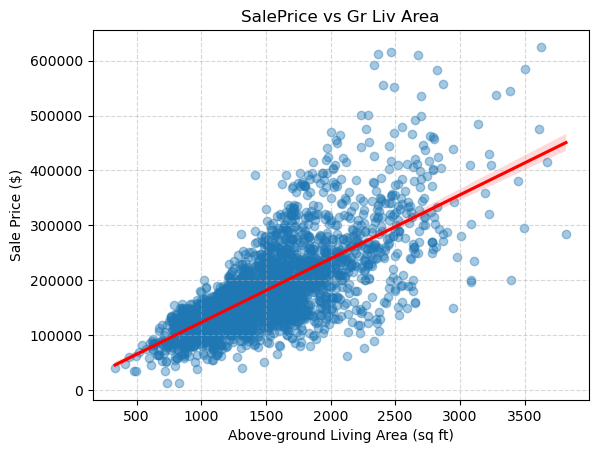

In [21]:
sns.regplot(x='Gr Liv Area', y='SalePrice', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red',})
plt.grid(True, linestyle='--', alpha=0.5)
plt.title("SalePrice vs Gr Liv Area")
plt.xlabel("Above-ground Living Area (sq ft)")
plt.ylabel("Sale Price ($)")
plt.show()

The visualization indicates a strong positive correlation between `SalePrice` and `Gr Liv Area`. This means that larger homes (in terms of above-ground living space) tend to command higher sale prices, and the likelihood of this relationship being due to random chance is nearly zero.

### Statistical Test 2 - Comparing two Independent Variables

In this test our objective will be to determine whether the SalePrice differs significantly between homes with paved vs. gravel/dirt driveways.

The hypothesis is as follows:

- $H_0: \mu\text{paved} = \mu\text{unpaved}$.      *There is no significant difference in  SalePrice between houses with paved and unpaved driveways.*
- $H_1: \mu\text{paved} \neq \mu\text{unpaved}$.   *The SalePrice differs between the two driveway types.*

Where $H_0$ is the null hypothesis and $H_1$ is the alternative hypothesis.

A suitable test for this hypothesis would be the Wilcoxon Mann-Whiteney U Test (Non Parametric Test). 

#### Why the Wilcoxon Mann-Whiteney U Test?

1. Normality of SalePrice

    - `SalePrice` is right-skewed, with a long tail of high-priced homes 

    - Homes with gravel/dirt driveways (PavedDrive = 'N' or 'P') are fewer and tend to be lower-priced, which further skews the distribution.

    - Normality tests (Shapiro-Wilk) typically fail at  $\alpha$  = 0.05 for both groups. (as observed in the above test two variable relationship test).

2. Equal Variance

    - The variance in `SalePrice` for paved driveways is much higher due to a wider range of home values.

    - Levene’s test often shows heteroscedasticity, unequal variances between groups.

The following assumptions will hold: 

1. Ordinal or Continuous: The variable you’re analyzing is ordinal or continuous. `SalePrice` is a continuous variable.

2. Independence: All of the observations from both groups are independent of each other. Neither `SalePrice` nor `Paved Drive` are dependent on one another.


The $\alpha$ value is 5%. If $p < 0.05$ then we reject the null hypothesis.

If $p-value < \alpha$ we will reject $H_0$ else, if $p-value >= \alpha$ we will fail to reject $H_0$

In [22]:
group_paved = df[df['Paved Drive'] == 2]['SalePrice']
group_unpaved = df[df['Paved Drive'] < 2]['SalePrice']

u_stat, p_val = stats.mannwhitneyu(group_paved, group_unpaved, alternative='two-sided')
print(f"Mann-Whitney U: U = {u_stat:.10f}, p = {p_val:.10f}")

Mann-Whitney U: U = 610441.0000000000, p = 0.0000000000


Given that our p-value for our statistical analysis is less than 0.05, we can reject the null hypothesis that there is no significant difference in `SalePrice` between houses with paved and unpaved driveways, in favour for the alternative. A $U$ value of 610441.00 indicates homes with paved driveways tend to sell for higher prices.

Let's create a visualization, that can provide supporting evidence to our statistical findings.

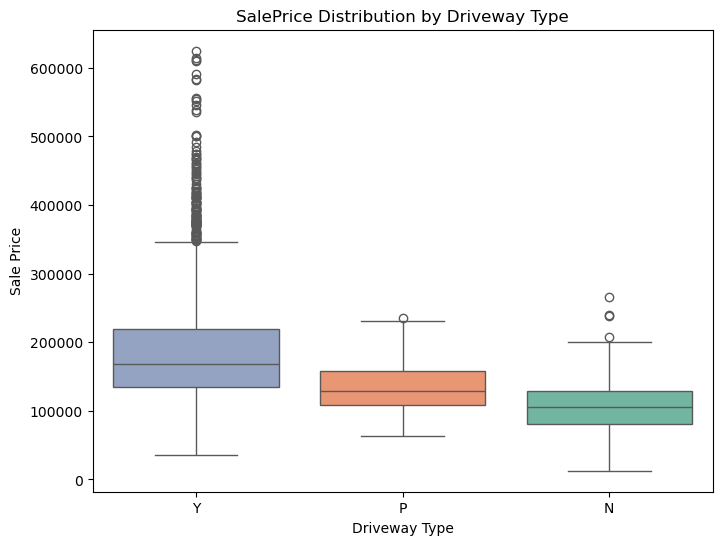

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(    data=df,
    x='Paved Drive',
    y='SalePrice',
    order=[2, 1, 0],
    hue='Paved Drive',
    palette='Set2',
    legend=False)
plt.title('SalePrice Distribution by Driveway Type')
plt.xlabel('Driveway Type')
plt.ylabel('Sale Price')
plt.xticks(ticks=[0, 1, 2], labels=['Y', 'P', 'N'])
plt.show()

The visualization indicates a strongly supports the Mann–Whitney result that paved homes tend to have higher `SalePrices`, as the median line for “Y” (paved) is higher and the box sits higher overall

### Statistical Test 3 - Comparing three or more variables

In this test we want to determine whether the average house sale price `SalePrice` differs significantly across different house styles `HouseStyle`.

The hypothesis is as follows:

- $H_0: \mu\text{1Story} = \mu\text{2Story} = \mu\text{1.5Fin} = \mu\text{SFoyer} = \mu\text{SLvl} = \mu\text{2.5Unf} = \mu\text{1.5Unf} = \mu\text{2.5Fin}$.      
    *The mean sale price is the same for all house styles.*

- $H_1: \text{At least one } \mu\text{i} \neq  \mu\text{j}$.   
    *At least one house style has a different mean sale price than the others.*

Where $H_0$ is the null hypothesis and $H_1$ is the alternative hypothesis.

A suitable test for this hypothesis would be the Kruskal–Wallis Test (Non Parametric Test). 

#### Why the Kruskal–Wallis Test?

1. Violation of Normality

    - `SalePrice` is right-skewed, with a long tail of high-priced homes. ANOVA assumes normally distributed residuals within each group, and this assumption is violated. Below we can see a code snippet where we check for normality of each `House Style` groups using Shapiro-Wilks test.

    ```python
    # Group SalePrice by HouseStyle
    grouped = df.groupby('House Style')['SalePrice']
    for style, group in grouped:
        stat, p = stats.shapiro(group)
        print(f'{style}: W={stat:.3f}, p={p:.3f}')
    """    
    1.5Fin: W=0.824, p=0.000
    1.5Unf: W=0.953, p=0.441
    1Story: W=0.882, p=0.000
    2.5Fin: W=0.826, p=0.054
    2.5Unf: W=0.836, p=0.001
    2Story: W=0.919, p=0.000
    SFoyer: W=0.965, p=0.024
    SLvl: W=0.884, p=0.000
    """
    ```

    We observe amongst P-values for all groups, only 2.5Fin seems to be normally distributed ($p >= 0.05$).

2. Unequal Group Sizes

    - `House Style` has unequal sample sizes, some styles (like “2Story” and “1Story”) are very common, others (like “SLvl” or “SFoyer”) have few examples.

        ANOVA’s robustness declines when:

        - Group sizes differ and
        
        - Variances differ.

3. Different Variances

    Homes of different styles have drastically different price variability.
    Example:
    - “2Story” homes can range from mid to very high prices.

    - “SFoyer” homes cluster tightly around lower prices.

    Levene’s test for equal variances almost always comes out p < 0.05, meaning ANOVA assumptions are violated.

4. Non-independence with Other Predictors

    `House Style` correlates with many other variables:

    - `Gr Liv Area` (larger in 2-story homes)

    - `Overall Qual` (quality ratings)

    - `Neighborhood`

    - `Year Built`

    This means the effect of HouseStyle on SalePrice isn’t isolated — it’s confounded by other features.

    ANOVA treats the independent variable as the only factor, which oversimplifies this relationship.

The following assumptions will hold: 

1. Ordinal or Continuous Response Variable – the response variable should be an ordinal or continuous variable. `SalePrice` is a continuous variable.

2. Independence – the observations in each group need to be independent of each other. Usually a randomized design will take care of this. Neither `SalePrice` nor `Paved Drive` are dependent on one another.


The $\alpha$ value is 5%. If $p < 0.05$ then we reject the null hypothesis.

If $p-value < \alpha$ we will reject $H_0$ else, if $p-value >= \alpha$ we will fail to reject $H_0$

In [24]:
# Group SalePrice by HouseStyle
groups = [df[df['House Style'] == style]['SalePrice'] for style in df['House Style'].unique()]

# Perform Kruskal-Wallis test
stat, pval = stats.kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {stat:.10f}, p-value: {pval:.10f}")

Kruskal-Wallis H-statistic: 329.5690081417, p-value: 0.0000000000


Given that our p-value for the Kruskal-Wallis test is 0.0000000000, which is far below the conventional threshold of 0.05, we can confidently reject the null hypothesis that there is no significant difference in `SalePrice` across the various `HouseStyle` categories. This result favors the alternative hypothesis — that at least one house style group differs significantly in SalePrice distribution compared to the others.

The H-statistic of 329.57 indicates a substantial divergence in ranked SalePrice values among the house styles. This suggests that house architectural style is a meaningful factor in determining home value in the Ames Housing dataset. For example, styles like `2Story` and `1Story` may command higher prices than less common or smaller formats like `1.5Unf` or `SFoyer`.

Let's create a visualization, that can provide supporting evidence to our statistical findings.

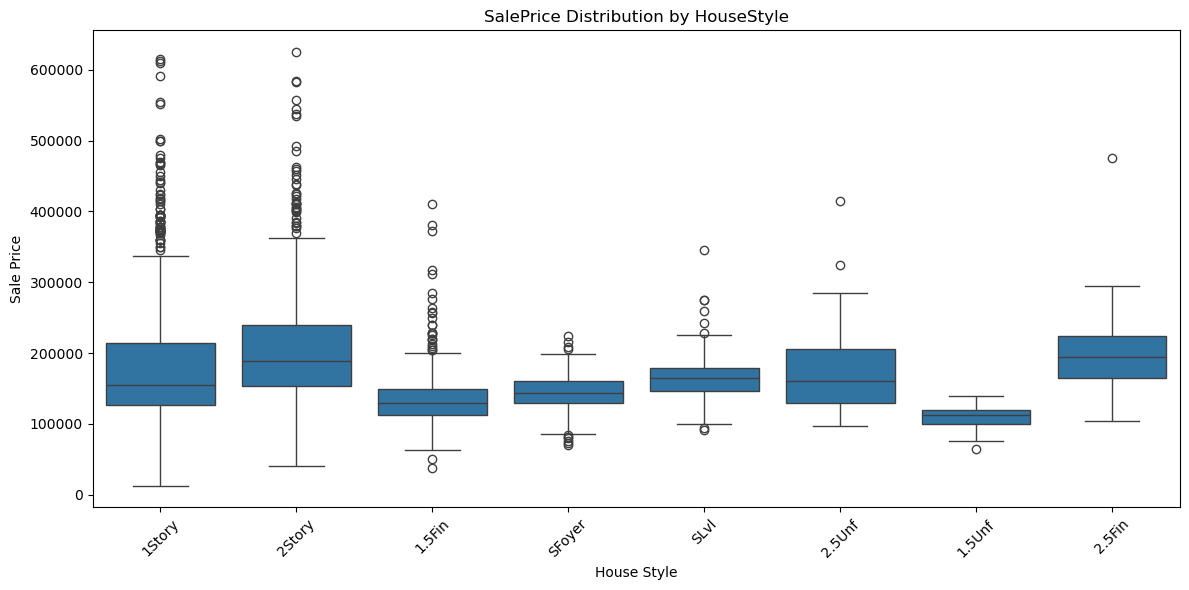

In [25]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='House Style', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title('SalePrice Distribution by HouseStyle')
plt.xlabel('House Style')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

In the box-plot above, we can observe the following:

- Median lines: Higher for styles like `2Story` and `1Story`

- Spread: Wider for common styles, indicating more variability

- Outliers: Present in most groups, especially high-end homes

This visual confirms that `HouseStyle` influences `SalePrice`, aligning with the Kruskal-Wallis test's significant result.

# Task 4: Linear Regression

Here we will be building a Multiple Linear Regression (MLR) model capable of modelling the sales price of a house. The Linear relationship between `SalesPrice` and the following independent variables (features) would be considered:

- `Gr Liv Area`
- `Overall Qual`
- `Garage Cars`
- `Lot Area`
- `Neighborhood`
- `House Style`
- `Central Air`

Mathematical Formula:
$\text{SalePrice} = \beta_{1}(\text{Gr Liv Area}) + \beta_{2}(\text{Overall Qual}) + \beta_{3}(\text{Garage Cars}) + \beta_{4}(\text{Lot Area}) + \beta_{5}(\text{Neighborhood}) + \beta_{6}(\text{House Style}) + \beta_{7}(\text{Central Air}) + c$



- $\text{Gr Liv Area}$, $\text{Overall Qual}$, $\text{Garage Cars}$, $\text{Lot Area}$, $\text{Neighborhood}$, $\text{House Style}$, $\text{Central Air}$, represent the seven(7) feature variables from the data.

- $\beta_{1}$, $\beta_{2}$, $\beta_{3}$, $\beta_{4}$, $\beta_{5}$, $\beta_{6}$, $\beta_{7}$, represent the parameters of the model which can be trained based on the data.

- $c$ represents the intercept (base value), without considering the other features.


This function (OLS) Ordinary Least Squares, is used to conduct the Multiple Linear Regression in statsmodels:


In [26]:
# copy the dataframe
df_copy = df.copy()

house_style_to_int = df_copy.groupby('House Style')['SalePrice'].median().rank().to_dict() # rank-based mapping based on average sale prices per style
df_copy.loc[:,'House Style'] = fill_and_replace('House Style', 0, house_style_to_int, False, dataset=df_copy)
df_copy.loc[:,'Central Air'] = fill_and_replace('Central Air', 0, {'N': 0, 'Y': 1}, False, dataset=df_copy)

# Dependent Variable (y):
y = df_copy['SalePrice']

# Predictior/ Independent Variables
features = ['Gr Liv Area', 'Overall Qual', 'Garage Cars', 'Lot Area', 'House Style', 'Central Air']
x = df_copy[features].dropna()

# Add Constant to the Model
X = sm.add_constant(x).astype(float) # Typecasting to float to avoid this error [ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)].
y = y.astype(float) # Typecasting to float to avoid this error [ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data)]

print("✅ All numeric? ", all(np.issubdtype(dt, np.number) for dt in X.dtypes))

# Fit Linear Regression Model:
model = sm.OLS(y, X).fit()

# Print model output:
print(model.summary())

Finished fill-and-replace for column 'House Style'
Finished fill-and-replace for column 'Central Air'
✅ All numeric?  True
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1824.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:52:00   Log-Likelihood:                -34840.
No. Observations:                2925   AIC:                         6.969e+04
Df Residuals:                    2918   BIC:                         6.974e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------

### Interpretation of Initial Model (Less accutate, Model does not include the Neighborhood feature)

The initial regression model I built achieved an `R-squared` value of 0.789 (78.9%). For this version, I manually converted the categorical variables `Central Air` and `House Style` into numeric form. The `Neighborhood` feature was excluded from the draft model since it contains numerous nominal categories that are not easily mapped manually into numerical values.

There are a number of interesting statistics that we can observe, some of which will inform that we need to update our model:

- R-Squared - 0.789: Determines how well our model with the current features fits the data. E.g. "78.9% of the variation in Property Value, can be explained by our seven features (Gr Liv Area, Overall Qual, Garage Cars, Lot Area, House Style, Central Air).
- coef (stand for coefficents in table 2): The coef values of -1.12e+05, 56.4783, 2.874e+04, 1.696e+04, 1.0623, -3622.0092, 1.029e+04, are the values of $c$, $\beta_\text{Gr Liv Area}$, $\beta_\text{Overall Qual}$, $\beta_\text{Garage Cars}$, $\beta_\text{Lot Area}$, $\beta_\text{House Style}$, $\beta_\text{Central Air}$ respectively. 


In [27]:
# copy the dataframe
df_copy = df.copy()

features = ['Gr Liv Area', 'Overall Qual', 'Garage Cars', 'Neighborhood', 'Lot Area', 'House Style', 'Central Air']

# Keep only relevant features
features.extend(['SalePrice'])
df_copy = df_copy[features].dropna()

# Encode categorical columns properly
df_copy = pd.get_dummies(df_copy, columns=['House Style', 'Central Air', 'Neighborhood'], drop_first=True, dtype=float)

# Make sure all data are numeric
df_copy = df_copy.apply(pd.to_numeric, errors='coerce')
df_copy = df_copy.dropna()  # drop rows with any NaN after coercion

# Log transform target (recommended)
df_copy['SalePrice'] = np.log1p(df_copy['SalePrice'])
df_copy['Lot Area'] = np.log1p(df_copy['Lot Area'])

# Define X and y
y = df_copy['SalePrice']
X = df_copy.drop('SalePrice', axis=1)

# Convert to pure NumPy arrays of float type
X = sm.add_constant(X).astype(float)
y = y.astype(float)

print("✅ All numeric? ", all(np.issubdtype(dt, np.number) for dt in X.dtypes))

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

✅ All numeric?  True
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     491.3
Date:                Thu, 13 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:52:00   Log-Likelihood:                 1460.6
No. Observations:                2925   AIC:                            -2841.
Df Residuals:                    2885   BIC:                            -2602.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const      

### Interpretation of Finalized Model

In this model we encode, patch and typecast the categorical as quantitative float columns. Using pandas `get_dummies` function, then normalize the data by transforming the target to logarithmetic and finally fitting the models.

There are a number of interesting statistics that we can observe, some of which will inform that we need to update our model:

- R-Squared: About 86.9% of variation in SalePrice is explained by the included features. The small gap between R² and adjusted R² signals that the added neighborhood dummies are contributing meaningful explanatory power without excessive overfitting.

- F-statistic (491.3, p < 0.001): The model as a whole is highly significant; collectively, the predictors explain SalePrice far better than a model with no predictors.

#### Interpreting coefficients as percentage effects

Because the intercept is around 9.83, the dependent variable is very likely log-transformed. Interpret each coefficient as an approximate percentage change in SalePrice for a one-unit change in the predictor, holding others constant:

- Continuous variables: A coefficient of $\beta ≈ \beta * 100\% $ change in price per unit.

- Binary/categorical variables: A coefficient of $\beta ≈ \beta * 100%$ difference vs. the baseline category; more precisely, use $100 * (exp(\beta) - 1)\% $ for larger effects.

- Intercept (9.8316): Baseline expected log SalePrice when all predictors are at zero/reference levels. It’s a mathematical anchor, not a meaningful “zero-sized house” price.

- Gr Liv Area (0.0003):

    - Effect: Each additional square foot ≈ +0.03% in price; +100 sq ft ≈ +3%.

- Overall Qual (0.1155):
    - Effect: Each one-point increase ≈ +11.6% in price. This is large and economically important.

- Garage Cars (0.0474):

    - Effect: Each additional car space ≈ +4.7%.

- Lot Area (0.0901):

    - Effect: If LotArea is logged (common), a 1-unit increase in ln(LotArea) (≈ +171% in area) ≈ +9.0% in price. If unlogged, this per-unit effect would be implausible, reinforcing that a transform is likely.

- HouseStyle (relative to the baseline style):

    - 1.5Unf (0.0231): Not significant (p = 0.518); effect indistinguishable from baseline.

    - 1Story (0.0693): ≈ +6.9% (p < 0.001).

    - 2.5Fin (−0.1575): ≈ −14.6% to −17.1% using exp transform (p = 0.004).

    - 2.5Unf (−0.0360): Not significant (p = 0.263).

    - 2Story (−0.0097): Not significant (p = 0.393).

    - SFoyer (0.1325): ≈ +13.3% (p < 0.001).

    - SLvl (0.0489): ≈ +4.9% (p = 0.004).

- Central Air_Y (0.1868):

    - Effect: Having central air ≈ +20.5% using exp transform (p < 0.001), a sizable premium.

#### Neighborhood effects (percentage differences vs. the baseline neighborhood)

Neighborhood dummies capture location premiums/discounts relative to the omitted baseline neighborhood:

- Large negative discounts:

    - IDOTRR (−0.2766): ≈ −24% to −24.2% (p < 0.001).

    - OldTown (−0.2203): ≈ −19.8% to −19.7% (p < 0.001).

- Meaningful negative discounts:

- Edwards (−0.1446), BrDale (−0.1770), MeadowV (−0.1521), NPkVill (−0.0894), NAmes (−0.1118), NWAmes (−0.1114), Sawyer (−0.1029), SawyerW (−0.0975), BrkSide (−0.1287), SWISU (−0.1381), Mitchel (−0.0809): All significant; magnitude ranges roughly −8% to −18%.

- Positive premiums:

    - GrnHill (0.3406): ≈ +40.6% using exp transform (p = 0.002).

    - NridgHt (0.0747): ≈ +7.8% (p = 0.018).

- Not significant (no reliable difference from baseline):

    - Blueste, ClearCr, CollgCr, Crawfor, Greens, Landmrk, NoRidge, Somerst, StoneBr, Timber, Veenker: p-values > 0.05.

Note: The exact baseline neighborhood is the one omitted during dummy encoding (not shown in the table). All coefficients are interpreted relative to that baseline.

### Questions & Answer

1. Which (if any) of the provided features were unimportant within the model? Explain the process for identifying this?

    #### Answer

    We will examine each variable's p-value from the regression summary. A variable is typically considered statistically insignificant if the $p-value > 0.05$. With that said we will split the variable's into significant and Not significant groups.

    __Significant__: `Gr Liv Area`, `Overall Qual`, `Garage Cars`, `Lot Area`, `Central Air_Y`, all highly significant and should be retained.

    __Not Significant__: `House Style_1.5Unf`, `House Style_2.5Unf`, `House Style_2Story` (insignificant), and several neighborhoods with p > 0.05 contribute little explanatory power e.g. `Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Timber`. These values are unimportant within this model.


2. What variable contributed was the most important/ contributed the most to the predictive power of your model? Explain the process for identifying this?

    #### Answer
    A Larger absolute t-values indicate stronger signal relative to noise, We can observe `OverallQual` has the largest t-statistic (34.5), the largest economically meaningful coefficient (+11.6% per unit), and a near-zero p-value.

    Therefore, `OverallQual` is the most important and contributed the most to the predictive power of the model. `Gr Liv Area` is also very strong (t = 30.4).

__Potential Improvements that can significantly improve clarity__: Remove the insignificant dummy variables for `House Style` and `Neighborhood`, then re-fit the model and re-evaluate the key p-values and the adjusted model output